# 1) Load and process data

[Go to the code of U-Net](#ch1)

In [2]:
!nvidia-smi

Fri Sep  4 09:58:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.00    Driver Version: 418.87.00    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:2F:00.0 Off |                    0 |
| N/A   25C    P0    25W / 250W |      0MiB / 16130MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Import packages

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Import data for validation and training

In [5]:
list_data = np.load('volc_case/train_data/tdata.npy')
list_label = np.load('volc_case/train_data/label.npy')[:, :, :, None]
list_nnode = np.load('volc_case/train_data/nnode.npy')

#Crop boundaries
list_data = list_data[:, 1:-1, 1:-1]
list_label = list_label[:, 1:-1, 1:-1]

print (list_data.shape, list_label.shape, list_nnode.shape)

(288, 498, 998, 2) (288, 498, 998, 1) (288, 3)


### Import data for test No.1

In [6]:
# list_data_test = np.load('new_case/test_data/tdata.npy')
list_data_test = np.load('volc_case/test_data/tdata.npy')
list_label_test = np.load('volc_case/test_data/label.npy')[:, :, :, None]
list_nnode_test = np.load('volc_case/test_data/nnode.npy')

#Crop boundaries
list_data_test = list_data_test[:, 1:-1, 1:-1]
list_label_test = list_label_test[:, 1:-1, 1:-1]

print (list_data_test.shape, list_label_test.shape, list_nnode_test.shape)

(12, 498, 998, 2) (12, 498, 998, 1) (12, 3)


### Import data for test No.2

In [7]:
list_data_jw_test = np.load('volc_case/jw_test/tdata.npy')
list_label_jw_test = np.load('volc_case/jw_test/label.npy')[:, :, :, None]
list_nnode_jw_test = np.load('volc_case/jw_test/nnode.npy')

#Crop boundaries
list_data_jw_test = list_data_jw_test[:, 1:-1, 1:-1]
list_label_jw_test = list_label_jw_test[:, 1:-1, 1:-1]

print (list_data_jw_test.shape, list_label_jw_test.shape, list_nnode_jw_test.shape)

(24, 98, 458, 2) (24, 98, 458, 1) (24, 3)


In [8]:
# Non-dimensionalization
ds_v = 0.0512 * 0.0256/(499 * 999)
ds_jw = 0.046 * 0.01/(99 * 459)
list_data[:, :, :, 0] *= ds_v
list_label *= ds_v
list_data_test[:, :, :, 0] *= ds_v
list_label_test *= ds_v
list_data_jw_test[:, :, :, 0] *= ds_jw
list_label_jw_test *= ds_jw

### Visualize the data of training, test1, test2

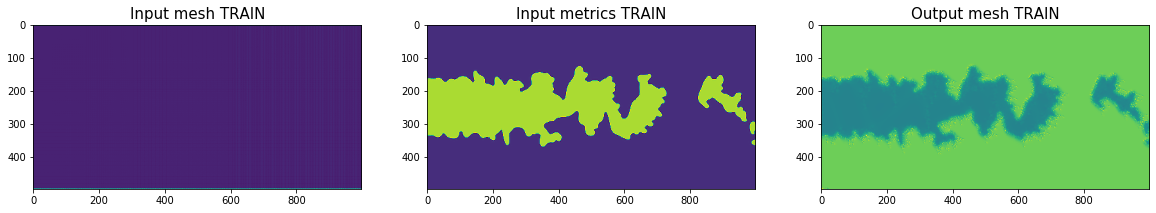

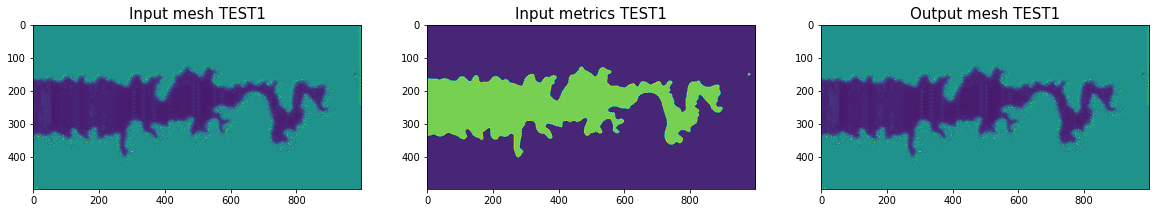

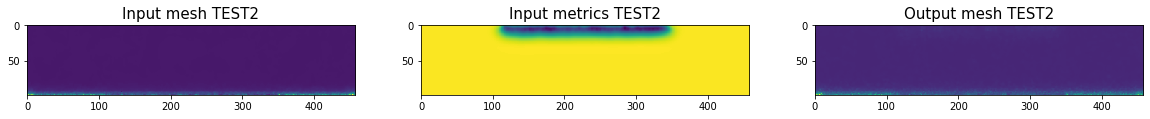

In [9]:
num = 0

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('Input mesh TRAIN', fontsize=15)
plt.imshow(list_data[num, :, :, 0], cmap='viridis')
#plt.colorbar()
plt.subplot(1, 3, 2)
plt.title('Input metrics TRAIN', fontsize=15)
plt.imshow(list_data[num, :, :, 1], cmap='viridis')
#plt.colorbar()
plt.subplot(1, 3, 3)
plt.title('Output mesh TRAIN', fontsize=15)
plt.imshow(list_label[num, :, :, 0])
#plt.colorbar()
plt.show()

num = 1

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('Input mesh TEST1', fontsize=15)
plt.imshow(list_data_test[num, :, :, 0], cmap='viridis')
#plt.colorbar()
plt.subplot(1, 3, 2)
plt.title('Input metrics TEST1', fontsize=15)
plt.imshow(list_data_test[num, :, :, 1], cmap='viridis')
#plt.colorbar()
plt.subplot(1, 3, 3)
plt.title('Output mesh TEST1', fontsize=15)
plt.imshow(list_data_test[num, :, :, 0])
#plt.colorbar()
plt.show()

num = 0

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('Input mesh TEST2', fontsize=15)
plt.imshow(list_data_jw_test[num, :, :, 0], cmap='viridis')
#plt.colorbar()
plt.subplot(1, 3, 2)
plt.title('Input metrics TEST2', fontsize=15)
plt.imshow(list_data_jw_test[num, :, :, 1], cmap='viridis')
#plt.colorbar()
plt.subplot(1, 3, 3)
plt.title('Output mesh TEST2', fontsize=15)
plt.imshow(list_label_jw_test[num, :, :, 0])
#plt.colorbar()
plt.show()

### A bit of data exploration

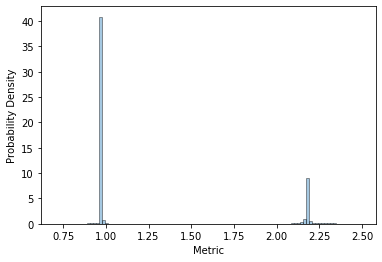

<Figure size 432x288 with 0 Axes>

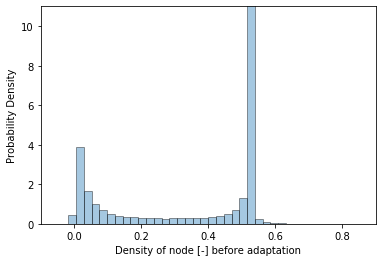

<Figure size 432x288 with 0 Axes>

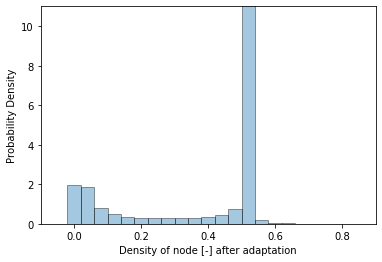

<Figure size 432x288 with 0 Axes>

In [9]:
import seaborn as sns
num = 3

plt.figure(figsize=(6, 4));
ax = sns.distplot(list_data[num, :, :, 1].flatten(), hist=True, kde=False,
             bins=int(100), hist_kws={'edgecolor':'black'}, norm_hist=True);
ax.set(xlabel='Metric', ylabel='Probability Density');
plt.show();
plt.clf();

plt.figure(figsize=(6, 4));
ax = sns.distplot(list_data[num, :, :, 0].flatten(), hist=True, kde=False,
             bins=int(100), hist_kws={'edgecolor':'black'}, norm_hist=True);
ax.set(xlabel='Density of node [-] before adaptation', ylabel='Probability Density');
plt.xlim(-0.1, 0.9);
plt.ylim(0, 11);
plt.show()
plt.clf();

plt.figure(figsize=(6, 4));
ax = sns.distplot(list_label[num, :, :, 0].flatten(), hist=True, kde=False,
             bins=int(100), hist_kws={'edgecolor':'black'}, norm_hist=True);
ax.set(xlabel='Density of node [-] after adaptation', ylabel='Probability Density');
plt.xlim(-0.1, 0.9);
plt.ylim(0, 11);
plt.show()
plt.clf();

In [10]:
#output integrated from the 2D field to compare with the unet later
y_train = list_label[:, np.newaxis].mean(axis=(1, 2, 3))
y_test = list_label_test[:, np.newaxis].mean(axis=(1, 2, 3))
y_test_jw = list_label_jw_test[:, np.newaxis].mean(axis=(1, 2, 3))

print (y_train.shape, y_test.shape, y_test_jw.shape)

(288, 1) (12, 1) (24, 1)


<a id="ch1"></a>
# 2) U-net

on prédit du 2D vers 2D (498, 998, 2) -> (498, 998, 1), et on intègre ensuite le champ 2D de la même façon qu'en section 2 pour pouvoir comparer le classifieur et le U-net (a corriger cf discussion corentin pour pouvoir comparer avec tekigo sans erreurs d'interpolation)  
  
  Pour de meilleurs résultats :
  On ne prédit pas le champ 2D, mais la différence entre l'output et le champ initial ! (et on rajoute ensuite le champ initial après le model.predict)

### Normalization and splitting

In [11]:
from sklearn.model_selection import train_test_split
t_size = 0.2

rel_y = list_label - list_data[:, :, :, 0:1]
X_train, X_valid, rel_y_train, rel_y_valid = train_test_split(list_data, rel_y, test_size = t_size, random_state = 42)

X_test1 = list_data_test
X_test2 = list_data_jw_test

rel_y_test1 = list_label_test-X_test1[:, :, :, 0:1]
rel_y_test2 = list_label_jw_test-X_test2[:, :, :, 0:1]

print (X_train.shape, X_valid.shape)
print (rel_y_train.shape, rel_y_valid.shape)
print (rel_y_test1.shape, rel_y_test2.shape)

(230, 498, 998, 2) (58, 498, 998, 2)
(230, 498, 998, 1) (58, 498, 998, 1)
(12, 498, 998, 1) (24, 98, 458, 1)


### UNet-model definition

In [12]:
from tensorflow import keras
from tensorflow.keras import Model, layers

def block_conv(conv, filters, BN):
    conv = layers.Conv2D(filters, 3, padding='same', kernel_initializer = 'he_normal')(conv)
    if BN:
        conv = layers.BatchNormalization()(conv)
    conv = layers.Activation('relu')(conv)
    conv = layers.Conv2D(filters, 3, padding='same', kernel_initializer = 'he_normal')(conv)
    if BN:
        conv = layers.BatchNormalization()(conv)
    conv = layers.Activation('relu')(conv)
    return conv


def block_up(conv, filters, BN):
    conv = block_conv(conv, filters, BN)
    conv = layers.UpSampling2D(size=(2, 2))(conv)
    return conv

def block_up_deconv(conv, filters, BN):
    conv = keras.layers.Conv2DTranspose(filters, 3, padding='same')(conv)
    conv = block_conv(conv, filters, BN)
    return conv

def UNET(inputs, filters, BN=True):
    conv1 = block_conv(inputs, filters, BN)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)   
    
    conv2 = block_conv(pool1, filters*2, BN)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = block_up(pool2, filters*4, BN)
    
    up4  = layers.concatenate([conv3, conv2])
    conv4 = block_up(up4, filters*2, BN) 
    
    up5  = layers.concatenate([conv4, conv1])
    conv5 = block_conv(up5, filters, BN)
    
    conv6 = layers.Conv2D(1, 1, padding='same')(conv5)
  
    return (Model(inputs=inputs, outputs=conv6))

### Data augmentation

In [13]:
#We use a generator to apply some modifications like flip to the fields
def generator_3D(inputs, outputs, batch_size, flip=True):
    while 1:
        dim_0 = 256
        dim_1 = 256
        liste_inputs = np.zeros((batch_size, dim_0, dim_1, 2))
        liste_outputs = np.zeros((batch_size, dim_0, dim_1, 1))

        for nb_field in range(batch_size):

            numero = np.random.randint(inputs.shape[0])
 

            abs_0 = np.random.randint(0, X_train.shape[1]-dim_0+1)
            abs_1 = np.random.randint(0, X_train.shape[2]-dim_1+1)
        
            liste_inputs[nb_field, :, :]=inputs[numero, abs_0:abs_0+dim_0, abs_1:abs_1+dim_1]

            liste_outputs[nb_field, :, :]=outputs[numero, abs_0:abs_0+dim_0, abs_1:abs_1+dim_1]
            
        if flip:
            for i, flip_by in enumerate(np.random.randint(4, size=batch_size)):
                if flip_by == 1 or flip_by == 2:
                    liste_inputs[i] = np.flip(liste_inputs[i], axis=flip_by)
                    liste_outputs[i] = np.flip(liste_outputs[i], axis=flip_by)

        yield liste_inputs, liste_outputs



### Model fitting

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import json
import pickle

batch_size=16
v_batch_size=1
steps = X_train.shape[0] #To adapt acording to the dim choosen in generator and the number of inputs
v_steps = int(rel_y_valid.shape[0]/v_batch_size)

train_generator = generator_3D(X_train, rel_y_train, batch_size)
valid_generator = generator_3D(X_valid, rel_y_valid, batch_size) 

callbacks = [ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1),
           EarlyStopping(monitor='val_loss', patience=15, verbose=1),
           ModelCheckpoint('save_model/U-net.h5', monitor='val_loss', verbose=1, save_best_only=True)]

inputs = keras.Input(shape = (None, None, 2))
model = UNET(inputs, 16, BN=True)
model.compile(optimizer=Adam(lr=0.001), loss='mse')
history = model.fit_generator(train_generator, epochs=100, steps_per_epoch=steps, validation_data=valid_generator, validation_steps = v_steps, callbacks=callbacks)

with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/100
229/230 [============================>.] - ETA: 0s - loss: 0.0425
Epoch 00001: val_loss improved from inf to 0.03777, saving model to save_model/U-net.h5
230/230 [==============================] - 30s 130ms/step - loss: 0.0424 - val_loss: 0.0378
Epoch 2/100
229/230 [============================>.] - ETA: 0s - loss: 0.0196
Epoch 00002: val_loss improved from 0.03777 to 0.01304, saving model to save_model/U-net.h5
230/230 [==============================] - 25s 110ms/step - loss: 0.0196 - val_loss: 0.0130
Epoch 3/100
229/230 [============================>.] - ETA: 0s - loss: 0.0166
Epoch 00003: val_loss did not improve from 0.01304
230/230 [==============================] - 25s 110ms/step - loss: 0.0167 - val_loss: 0.0148
Epoch 4/100
229/230 [============================>.] - ETA: 0s - loss: 0.0147
Epoch 00004: val_loss did not improve from 0.01304
230/230 [==============================] - 25s 110ms/step - loss: 0.0147 - val_loss: 0.0171
Epoch 5/100
229/230 [=================

### Evaluation

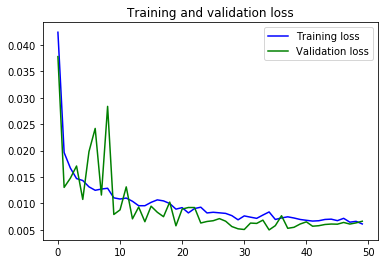

In [15]:
import matplotlib.pyplot as plt
import pickle

with open('trainHistoryDict', 'rb') as f:
    history = pickle.load(f)
    
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# from tensorflow.keras import backend as K 
from tensorflow.keras.models import load_model

# K.clear_session()
model = load_model('save_model/U-net.h5')

### Prediction on validation, test1, test2

In [17]:
#We have to predict for a dimension with a multiple of 16
predictions_2D_train = model.predict(list_data[:,:496,:992])+list_data[:,:496,:992,0:1]
predictions_2D_test = model.predict(list_data_test[:,:496,:992])+list_data_test[:,:496,:992,0:1]
predictions_2D_test_jw = model.predict(list_data_jw_test[:,:96,:448])+list_data_jw_test[:,:96,:448,0:1]

In [18]:
nnode_train = predictions_2D_train.mean(axis=(1, 2, 3))
nnode_test = predictions_2D_test.mean(axis=(1, 2, 3))
nnode_test_jw = predictions_2D_test_jw.mean(axis=(1, 2, 3))

persistance_train = list_data[:,:,:,0:1].mean(axis=(1, 2, 3))
persistance_test = list_label_test[:,:,:,0:1].mean(axis=(1, 2, 3))
persistance_test_jw = list_data_jw_test[:,:,:,0:1].mean(axis=(1, 2, 3))

### Error estimation

In [19]:
def relative_error(y_true, predictions):
    y_true, predictions = np.squeeze(y_true), np.squeeze(predictions)
    return (np.mean(np.abs(100* (y_true-predictions)/y_true)))

In [20]:
print("Loss to label images (number of node by interpolation)")

print (f"loss_U-net_train = {relative_error(y_train, nnode_train):.5}%")
print (f"loss_U-net_test1 = {relative_error(y_test, nnode_test[:]):.5}%")
print (f"loss_U-net_test2 = {relative_error(y_test_jw, nnode_test_jw[:]):.5}%")

print (f"loss_persistance_train = {relative_error(y_train, persistance_train[:]):.5}%")
print (f"loss_persistance_test1 = {relative_error(y_test, persistance_test[:]):.5}%")
print (f"loss_persistance_test2 = {relative_error(y_test_jw, persistance_test_jw[:]):.5}%")

Loss to label images (number of node by interpolation)
loss_U-net_train = 2.3157%
loss_U-net_test1 = 4.3617%
loss_U-net_test2 = 100.62%
loss_persistance_train = 7.3192%
loss_persistance_test1 = 0.0%
loss_persistance_test2 = 25.897%


### Vizualization on the prediction results

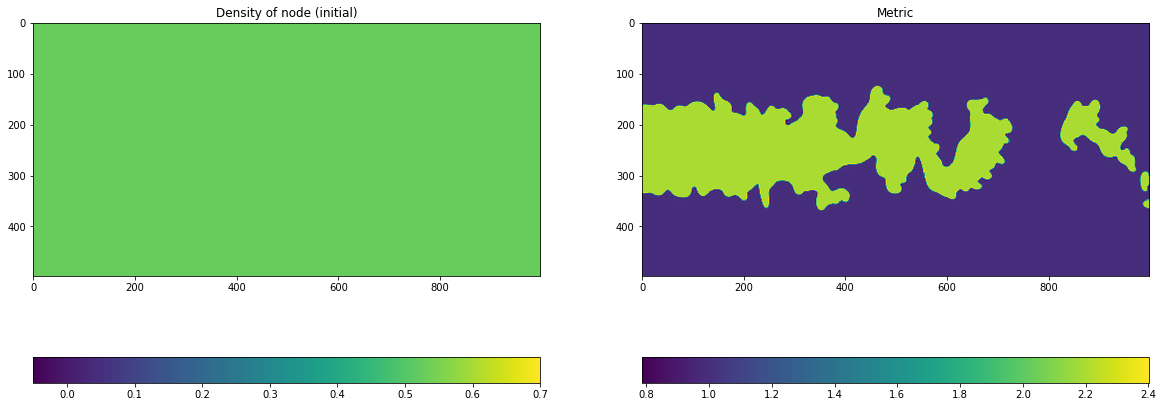

In [21]:
num = 0

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Density of node (initial)')
plt.imshow(list_data[num, :, :, 0], vmin=-0.05, vmax=0.7)
plt.colorbar(orientation="horizontal")
plt.savefig('before.png')
plt.subplot(1, 2, 2)
plt.title('Metric')
plt.imshow(list_data[num, :, :, 1])
plt.colorbar(orientation="horizontal")
plt.savefig('metric.png')
plt.show()

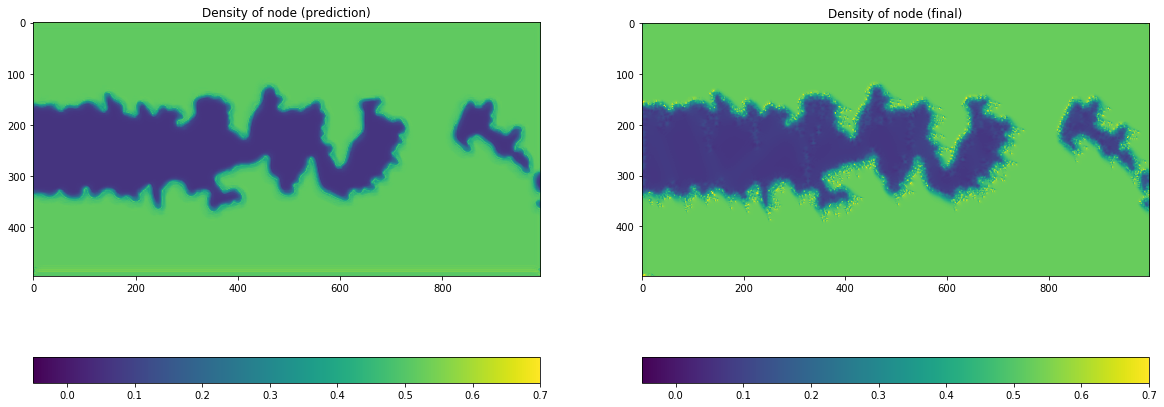

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Density of node (prediction)')
plt.imshow(predictions_2D_train[num, :, :, 0], vmin=-0.05, vmax=0.7)
plt.colorbar(orientation="horizontal")
plt.savefig('predition.png')
plt.subplot(1, 2, 2)
plt.title('Density of node (final)')
plt.imshow(list_label[num, :, :, 0], vmin=-0.05, vmax=0.7)
plt.colorbar(orientation="horizontal")
plt.savefig('after.png')
plt.show()

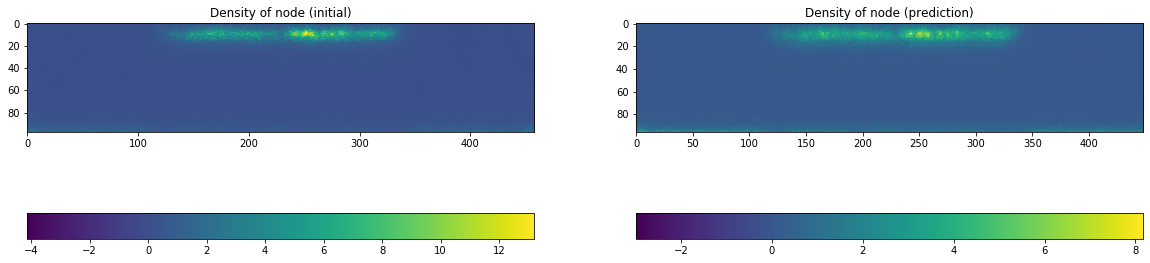

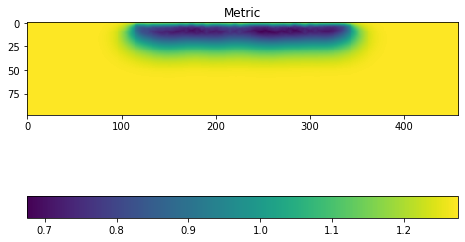

In [23]:
num = 20

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Density of node (initial)')
plt.imshow(list_label_jw_test[num, :, :, 0])
plt.colorbar(orientation="horizontal")
plt.subplot(1, 2, 2)
plt.title('Density of node (prediction)')
plt.imshow(predictions_2D_test_jw[num, :, :, 0])
plt.colorbar(orientation="horizontal")
plt.show()

plt.figure(figsize=(17, 10))
plt.subplot(1, 2, 1)
plt.title('Metric')
plt.imshow(X_test2[num, :, :, 1])#, vmin=vmin, vmax=vmax)
plt.colorbar(orientation="horizontal")
plt.show()

### Calculate the node-number from the predicted images and estimate errors comparing to the real-node numbers

In [24]:
nnode_ini_den_p = (list_data[:, :, :, 0]*0.5).sum(axis=(1,2))[:,np.newaxis]
nnode_fin_den_p = (list_label[:, :, :, 0]*0.5).sum(axis=(1,2))[:,np.newaxis]

In [25]:
def error_est(est, real):
    dum = np.abs(est - real) * 100. / real
    return dum.mean(axis=(0,1))

In [26]:
tekigo_prediction = list_nnode[:, 0][:,np.newaxis]
initial_node = list_nnode[:, 1][:,np.newaxis]
final_node = list_nnode[:, 2][:,np.newaxis]

In [27]:
# Error relative to the interpolation
print(f"Error in the initial mesh = {error_est(nnode_ini_den_p, initial_node):.5}%")
print(f"Error in the final mesh = {error_est(nnode_fin_den_p, final_node):.5}%")

Error in the initial mesh = 0.6961%
Error in the final mesh = 0.61565%


In [28]:
# cell-number/2 = node-number is assumed here under the hypothesis of a fully uniform triangle cells
nnode_fin_den_pre = (predictions_2D_train[:, :, :, 0]*0.5).sum(axis=(1,2))[:,np.newaxis]

In [29]:
print(f"Error of the prediction by tekigo: = {error_est(tekigo_prediction, final_node):.5}%")
print(f"Error of the prediction by Deep Learning: = {error_est(nnode_fin_den_pre, final_node):.5}%")
print(f"Error attributed to the interpolation: = {error_est(nnode_fin_den_p, final_node):.5}%")

Error of the prediction by tekigo: = 7.5182%
Error of the prediction by Deep Learning: = 3.3694%
Error attributed to the interpolation: = 0.61565%
